In [1]:
import logging
import datetime

import matplotlib.pyplot as plt
import requests

import ddlpy

# show what's happening in the background
# this makes sure that we see log messages in the notebook
logging.basicConfig()
# show log messages of ddlpy
ddlpy.ddlpy.logger.setLevel(logging.DEBUG)

%matplotlib inline

# Get a list of all known locations
The  method locations gets a list of all known measurement locations by sending a request. 

In [2]:
locations = ddlpy.locations()

DEBUG:ddlpy.ddlpy:requesting: https://waterwebservices.rijkswaterstaat.nl/METADATASERVICES_DBO/OphalenCatalogus with {"CatalogusFilter": {"Eenheden": true, "Grootheden": true, "Hoedanigheden": true, "Parameters": true, "Compartimenten": true}}


In [3]:
locations.to_json(r'locations.json', orient='records')

In [4]:
# also add code as a variable
locations['Code'] = locations.index
locations.head()

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,
BRUINSBNN,95355,25831,575630.130044,5.724596e+06,Bruinisse binnen,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,BRUINSBNN
KRAMMR,95557,25831,575753.628658,5.724490e+06,Krammer,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,KRAMMR
APPZK20,95865,25831,514144.416408,5.704883e+06,Appelzak 20 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,APPZK20
BATHBI71,95920,25831,581099.926393,5.693137e+06,Bath boei 71,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,BATHBI71
BOCHTVSJCB,95933,25831,577615.572113,5.726581e+06,Bocht van St Jacob,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,BOCHTVSJCB


## Validate
Check  if data is in the domain of the Netherlands. It also includes data of the North Sea.

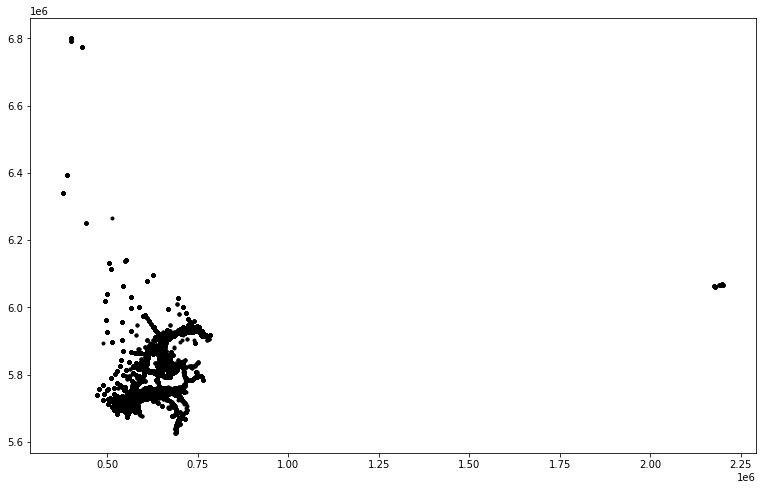

In [5]:
# Create a spatial plot
fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(locations.X, locations.Y, 'k.')

In [6]:
# CHECK See what the data in the east is.
# These is a reference river for water quality near Chernobyl. 
locations.sort_values('X',  ascending=False).head(n=5)

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,
PRIPYHGIII1,97967,25831,2.199824e+06,6.067918e+06,PRIPYAT hoofdgeul III.1,Temperatuur Oppervlaktewater oC,OW,Oppervlaktewater,oC,graad Celsius,T,Temperatuur,NVT,Niet van toepassing,NVT,Waarde is niet van toepassing,PRIPYHGIII1
PRIPYHGIII1,97967,25831,2.199824e+06,6.067918e+06,PRIPYAT hoofdgeul III.1,Verzadigingsgraad zuurstof in Oppervlaktewater %,OW,Oppervlaktewater,%,procent,VERZDGGD,Verzadigingsgraad,NVT,Niet van toepassing,O2,zuurstof,PRIPYHGIII1
PRIPYHGIII1,97967,25831,2.199824e+06,6.067918e+06,PRIPYAT hoofdgeul III.1,Zuurgraad Oppervlaktewater,OW,Oppervlaktewater,DIMSLS,dimensieloos,pH,Zuurgraad,NVT,Niet van toepassing,NVT,Waarde is niet van toepassing,PRIPYHGIII1
PRIPYPSIII1,97957,25831,2.199683e+06,6.067206e+06,PRIPYAT plas III.1,Temperatuur Oppervlaktewater oC,OW,Oppervlaktewater,oC,graad Celsius,T,Temperatuur,NVT,Niet van toepassing,NVT,Waarde is niet van toepassing,PRIPYPSIII1
PRIPYPSIII1,97957,25831,2.199683e+06,6.067206e+06,PRIPYAT plas III.1,Verzadigingsgraad zuurstof in Oppervlaktewater %,OW,Oppervlaktewater,%,procent,VERZDGGD,Verzadigingsgraad,NVT,Niet van toepassing,O2,zuurstof,PRIPYPSIII1


In [7]:
codes = ['HOEKVHLD', 'IJMDBTHVN','SCHEVNGN']
parameters = ['WATHTE']
selected = locations[locations.index.isin(codes)]
selected = selected[selected['Grootheid.Code'].isin(parameters)]
selected

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,
HOEKVHLD,93728,25831,576917.669784,5.759136e+06,Hoek van Holland,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,HOEKVHLD
IJMDBTHVN,93757,25831,605633.035699,5.813598e+06,IJmuiden buitenhaven,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,IJMDBTHVN
SCHEVNGN,93858,25831,586550.994421,5.772806e+06,Scheveningen,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,SCHEVNGN


In [8]:
names = 'uit de kust'
selected = locations[locations.Naam.str.contains(names)].head()
selected

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,
APPZK20,95865,25831,514144.416408,5.704883e+06,Appelzak 20 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,APPZK20
GOERE6,96206,25831,560056.490959,5.746818e+06,Goeree 6 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,GOERE6
NOORDWK10,96582,25831,588722.435888,5.795362e+06,Noordwijk 10 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,NOORDWK10
NOORDWK2,96585,25831,595875.376191,5.790953e+06,Noordwijk 2 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,NOORDWK2
NOORDWK30,96592,25831,571235.381503,5.804566e+06,Noordwijk 30 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,NOORDWK30


In [9]:
# numtiple parameters avaialble per location
# each combination is a row
records = locations.loc['SCHEVNGN']
records

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,
SCHEVNGN,93858,25831,586550.994421,5.772806e+06,Scheveningen,Waterhoogte berekend Oppervlaktewater t.o.v. N...,OW,Oppervlaktewater,cm,centimeter,WATHTBRKD,Waterhoogte berekend,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,SCHEVNGN
SCHEVNGN,93858,25831,586550.994421,5.772806e+06,Scheveningen,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,SCHEVNGN


In [ ]:
# if we pass one row to the measurements function you can get all the measurements
measurements = ddlpy.measurements(records.iloc[0], datetime.datetime(2019,1,1), datetime.datetime(2020,2,1))

  0%|          | 0/13 [00:00<?, ?it/s]DEBUG:ddlpy.ddlpy:requesting:  {'AquoPlusWaarnemingMetadata': {'AquoMetadata': {'Eenheid': {'Code': 'cm'}, 'Grootheid': {'Code': 'WATHTBRKD'}, 'Hoedanigheid': {'Code': 'NAP'}}}, 'Locatie': {'X': 586550.994420996, 'Y': 5772806.43069697, 'Code': 'SCHEVNGN'}, 'Periode': {'Begindatumtijd': '2019-01-01T00:00:00.000+00:00', 'Einddatumtijd': '2019-02-01T00:00:00.000+00:00'}}
/Users/baart_f/src/ddlpy/ddlpy/ddlpy.py:139: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = pd.io.json.json_normalize(rows)
 23%|██▎       | 3/13 [00:05<00:18,  1.85s/it]DEBUG:ddlpy.ddlpy:requesting:  {'AquoPlusWaarnemingMetadata': {'AquoMetadata': {'Eenheid': {'Code': 'cm'}, 'Grootheid': {'Code': 'WATHTBRKD'}, 'Hoedanigheid': {'Code': 'NAP'}}}, 'Locatie': {'X': 586550.994420996, 'Y': 5772806.43069697, 'Code': 'SCHEVNGN'}, 'Periode': {'Begindatumtijd': '2019-04-01T00:00:00.000+00:00', 'Einddatumtijd': '2019-05-01T00:00:00.000+00:00

In [ ]:
measurements.plot('t',  'Meetwaarde.Waarde_Numeriek', linewidth=0.1, figsize=(13, 8))